# Tutorial 5

## Binary Classification Using Decision Trees and Metrics for Performance Evaluation

For this tutorial we will use NBA basket ball data set to predict whether a basket ball player will last 5 years in league.
This means it is a binary classification problem and our class variables will be encoded as :
- y = 0 if career years played < 5
- y = 1 if career years played >= 5
Below are the name of attributes and their description

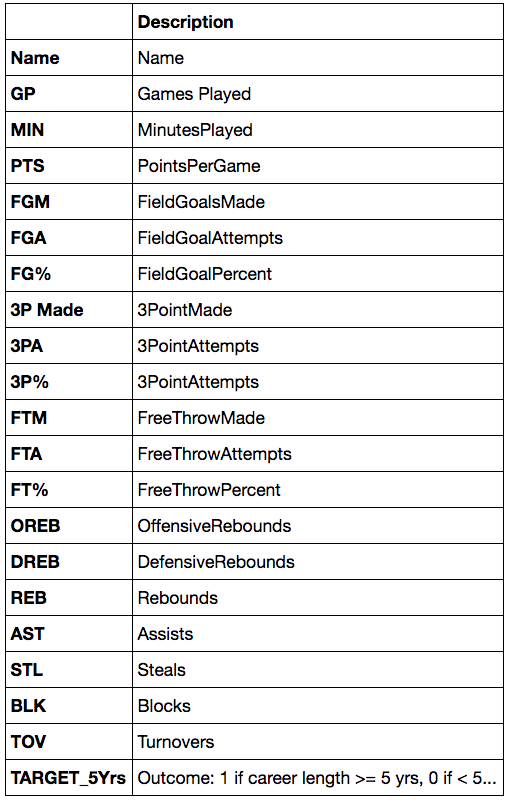

In [1]:
from IPython import display 
display.Image("https://data.world/api/exercises/dataset/logistic-regression-exercise-1/file/raw/Screen%20Shot%202017-01-25%20at%2010.20.38%20AM.png")

## Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import random as random
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

C:\Users\uzeea\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# reading csv files
data =  pd.read_csv('data.csv', sep=",")
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [4]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


## Exploring data and Preprocessing 

In [5]:
data.isnull().sum(axis =0)

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [6]:
#replace 3P% null values with mean of the column
data['3P%'].fillna((data['3P%'].mean()), inplace=True)

In [7]:
data.isnull().sum(axis =0)

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

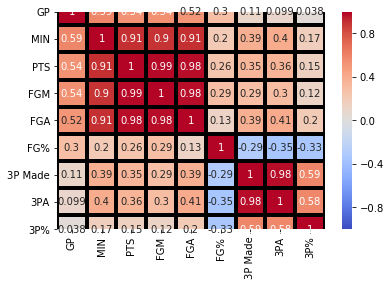

In [8]:
#check for corelation 
#subset only first 10 columns so that it is easy to visualize
sub_data = data.iloc[:,:10]
sns.heatmap(sub_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [9]:
#droping name varaible as it is not important for modelling
data = (data.drop("Name",axis =1))

## Modelling : Decision Trees

In [10]:
#fix the randomness
random.seed(123)
#seperate dependent and independent attributes
Independent = data.drop("TARGET_5Yrs",axis =1)
Dependent   = data["TARGET_5Yrs"]

In [11]:
#Split the data in train(66%) and test(33%):
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.33, random_state=42)

In [12]:
print("The shape of training data is : ", X_train.shape)
print("The shape of class variable in  training data is : ", y_train.shape)
print("The shape of test data is : ", X_test.shape)
print("The shape of class variable in testing data is : ", y_test.shape)

The shape of training data is :  (897, 19)
The shape of class variable in  training data is :  (897,)
The shape of test data is :  (443, 19)
The shape of class variable in testing data is :  (443,)


In [13]:
X_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
321,82,23.9,9.4,3.5,7.3,48.1,0.1,0.2,31.3,2.3,2.9,79.8,0.7,0.7,1.5,4.8,0.8,0.1,1.9
482,23,8.3,1.3,0.5,1.3,36.7,0.0,0.0,0.0,0.4,0.9,45.0,0.7,1.3,2.0,0.5,0.1,0.3,0.7
787,57,19.0,7.6,2.7,6.7,40.1,0.1,0.3,18.8,2.2,2.7,81.4,0.6,1.7,2.3,2.8,0.9,0.1,1.4
1053,70,9.2,2.0,0.8,1.6,48.7,0.0,0.0,100.0,0.4,0.5,70.3,1.1,1.1,2.2,0.3,0.1,0.1,0.4
1214,44,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0


In [14]:
#create an instance/object of Classifier
model = tree.DecisionTreeClassifier()
#fit the model
model = model.fit(X = X_train,y = y_train)

[Text(183.72484556686047, 211.7178947368421, 'X[0] <= 64.5\ngini = 0.469\nsamples = 897\nvalue = [337, 560]'),
 Text(114.87460029069767, 200.2736842105263, 'X[5] <= 41.75\ngini = 0.499\nsamples = 494\nvalue = [259, 235]'),
 Text(71.23015988372093, 188.82947368421054, 'X[3] <= 2.25\ngini = 0.446\nsamples = 229\nvalue = [152, 77]'),
 Text(49.027761627906976, 177.38526315789474, 'X[13] <= 0.95\ngini = 0.409\nsamples = 195\nvalue = [139, 56]'),
 Text(18.248546511627907, 165.94105263157894, 'X[11] <= 92.3\ngini = 0.465\nsamples = 117\nvalue = [74, 43]'),
 Text(16.302034883720932, 154.49684210526317, 'X[5] <= 33.95\ngini = 0.448\nsamples = 112\nvalue = [74, 38]'),
 Text(5.83953488372093, 143.05263157894737, 'X[15] <= 1.85\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(3.8930232558139535, 131.60842105263157, 'X[0] <= 42.0\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(1.9465116279069767, 120.16421052631578, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(5.83953488372093, 12

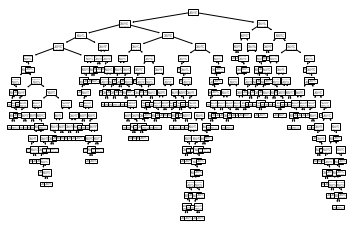

In [15]:
#model calculations
tree.plot_tree(model)

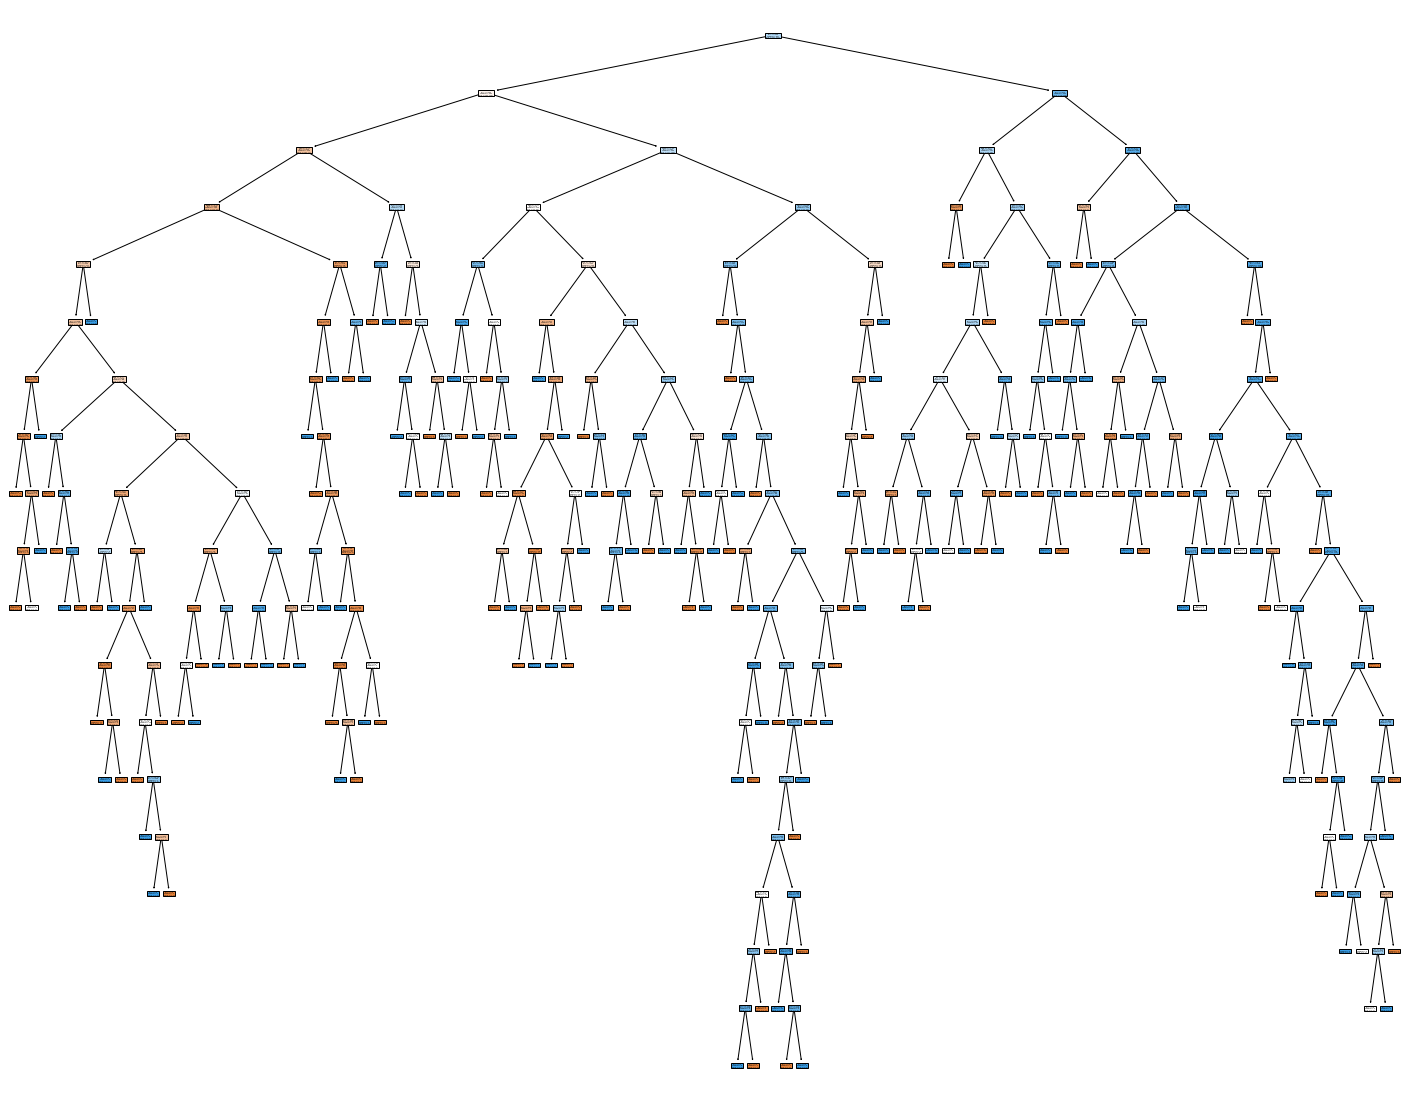

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=Independent.columns,
                   filled=True)

In [17]:
#caluculate predictions from X_test
predictions = model.predict(X_test)

## Confusion Matrix

In [18]:
#make confusion matrix
confusion_matrix(y_test, predictions)

array([[ 81,  91],
       [ 73, 198]], dtype=int64)

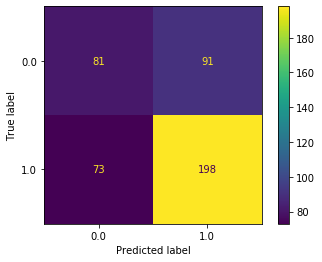

In [19]:
#plot the matrix
plot_confusion_matrix(model, X_test, y_test) 

## Classification Report

In [20]:
print(classification_report(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50       172
           1       0.69      0.73      0.71       271

    accuracy                           0.63       443
   macro avg       0.61      0.60      0.60       443
weighted avg       0.62      0.63      0.63       443



## END 